In [226]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [227]:
horse=pd.read_csv('data/2018_Equibase_Horse_Rank.csv')

In [228]:
horse=horse.drop('Unnamed: 0', axis=1)

In [229]:
horse

,winPercentage,horseName,referenceNumber,earnings,rank,place,sireReferenceNumber,starts,sireName,speedFigure,perStart,topThreePercentage,show,win,topThree,registry
0,1.000000,Gun Runner,9496167,7000000,1,0,5902892,1,Candy Ride (ARG),128,7000000.0,1.0,0,1,1,T
1,0.857143,Accelerate,9534904,5005000,2,1,8081070,7,Lookin At Lucky,122,715000.0,1.0,0,6,7,T
2,1.000000,Justify,9896728,3798000,3,0,7192241,6,Scat Daddy,114,633000.0,1.0,0,6,6,T
3,0.857143,Monomoy Girl,9892147,2818200,4,1,8333257,7,Tapizar,118,402600.0,1.0,0,6,7,T
4,0.250000,Gunnevera,9679803,2484600,5,2,8266889,4,Dialed In,115,621150.0,1.0,1,1,4,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50973,0.000000,Zarby's Idol,9882494,0,49020,0,979213,1,Zarbyev,0,0.0,0.0,0,0,0,T
50974,0.000000,Zasha,9088762,0,49020,0,1317382,1,Desert God,49,0.0,0.0,0,0,0,T
50975,0.000000,Zebedee Zered,9957032,0,49020,0,5622747,1,Mauk Four,0,0.0,0.0,0,0,0,T
50976,0.000000,Zipline,9275923,0,49020,0,4444702,1,City Zip,42,0.0,0.0,0,0,0,T


In [230]:
horse=horse.drop_duplicates()

In [231]:
horse

,winPercentage,horseName,referenceNumber,earnings,rank,place,sireReferenceNumber,starts,sireName,speedFigure,perStart,topThreePercentage,show,win,topThree,registry
0,1.000000,Gun Runner,9496167,7000000,1,0,5902892,1,Candy Ride (ARG),128,7000000.0,1.0,0,1,1,T
1,0.857143,Accelerate,9534904,5005000,2,1,8081070,7,Lookin At Lucky,122,715000.0,1.0,0,6,7,T
2,1.000000,Justify,9896728,3798000,3,0,7192241,6,Scat Daddy,114,633000.0,1.0,0,6,6,T
3,0.857143,Monomoy Girl,9892147,2818200,4,1,8333257,7,Tapizar,118,402600.0,1.0,0,6,7,T
4,0.250000,Gunnevera,9679803,2484600,5,2,8266889,4,Dialed In,115,621150.0,1.0,1,1,4,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50973,0.000000,Zarby's Idol,9882494,0,49020,0,979213,1,Zarbyev,0,0.0,0.0,0,0,0,T
50974,0.000000,Zasha,9088762,0,49020,0,1317382,1,Desert God,49,0.0,0.0,0,0,0,T
50975,0.000000,Zebedee Zered,9957032,0,49020,0,5622747,1,Mauk Four,0,0.0,0.0,0,0,0,T
50976,0.000000,Zipline,9275923,0,49020,0,4444702,1,City Zip,42,0.0,0.0,0,0,0,T


In [235]:
horse

,winPercentage,horseName,referenceNumber,earnings,rank,place,sireReferenceNumber,starts,sireName,speedFigure,perStart,topThreePercentage,show,win,topThree,registry
0,1.000000,Gun Runner,9496167,7000000,1,0,5902892,1,Candy Ride (ARG),128,7000000.0,1.0,0,1,1,T
1,0.857143,Accelerate,9534904,5005000,2,1,8081070,7,Lookin At Lucky,122,715000.0,1.0,0,6,7,T
2,1.000000,Justify,9896728,3798000,3,0,7192241,6,Scat Daddy,114,633000.0,1.0,0,6,6,T
3,0.857143,Monomoy Girl,9892147,2818200,4,1,8333257,7,Tapizar,118,402600.0,1.0,0,6,7,T
4,0.250000,Gunnevera,9679803,2484600,5,2,8266889,4,Dialed In,115,621150.0,1.0,1,1,4,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50973,0.000000,Zarby's Idol,9882494,0,49020,0,979213,1,Zarbyev,0,0.0,0.0,0,0,0,T
50974,0.000000,Zasha,9088762,0,49020,0,1317382,1,Desert God,49,0.0,0.0,0,0,0,T
50975,0.000000,Zebedee Zered,9957032,0,49020,0,5622747,1,Mauk Four,0,0.0,0.0,0,0,0,T
50976,0.000000,Zipline,9275923,0,49020,0,4444702,1,City Zip,42,0.0,0.0,0,0,0,T


In [237]:
horsenum=horse[["winPercentage","earnings","place","starts","speedFigure","perStart","topThreePercentage","show","win","topThree"]]
horsen=horse[['horseName','referenceNumber']]

In [197]:
horsesam=horsenum.sample(397,random_state=42)

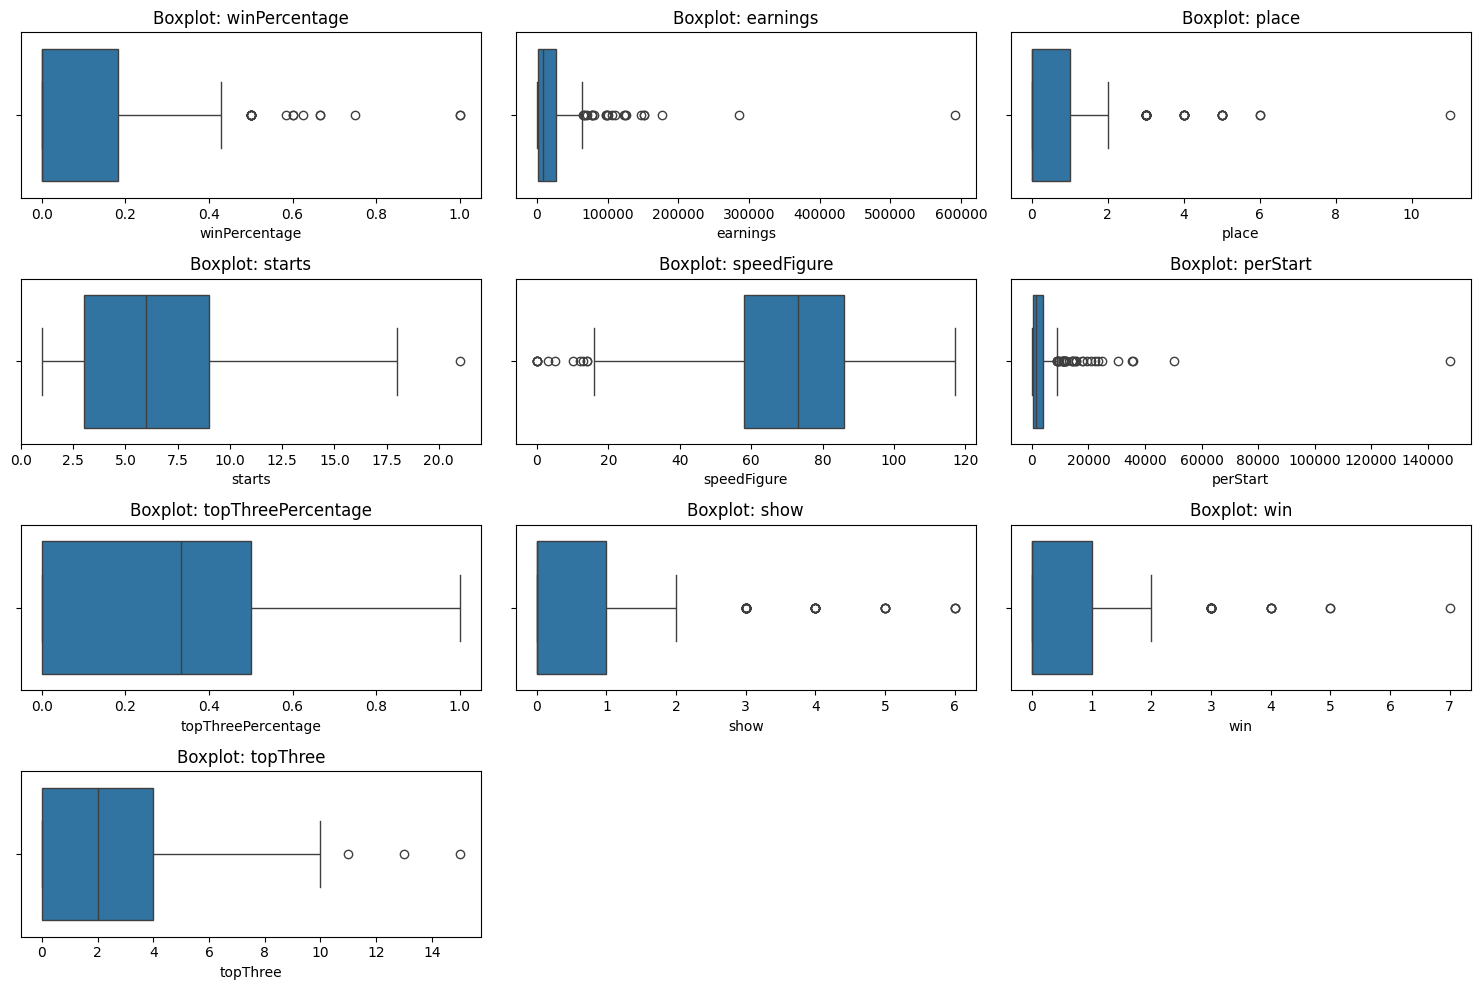

In [198]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(horsesam, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=horsesam[col])
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

In [199]:
horsenum2=horsenum.drop(horsenum[horsenum.earnings>=22500].index)
horsenum2=horsenum2.drop(horsenum2[horsenum2.winPercentage>=0.3].index)
horsenum2=horsenum2.drop(horsenum2[horsenum2.starts>=15].index)
horsenum2=horsenum2.drop(horsenum2[horsenum2.speedFigure<=12].index)
horsenum2=horsenum2.drop(horsenum2[horsenum2.perStart>=4500].index)
horsenum2=horsenum2.drop(horsenum2[horsenum2.place>=3].index)
horsenum2=horsenum2.drop(horsenum2[horsenum2.topThree>=8].index)
horsenum2=horsenum2.drop(horsenum2[horsenum2.show>=3].index)

In [200]:
horsenum3=horsenum.drop(horsenum[horsenum.winPercentage==0].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.winPercentage>=0.5].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.earnings>60000].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.perStart>7500].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.starts>17].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.show>5].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.speedFigure<=40].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.speedFigure>=115].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.place>=6].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.topThree>=10].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.topThreePercentage>=1].index)
horsenum3=horsenum3.drop(horsenum3[horsenum3.win>=4].index)

In [201]:
horsenum3.shape

(16120, 10)

In [202]:
horsenum2.shape

(27186, 10)

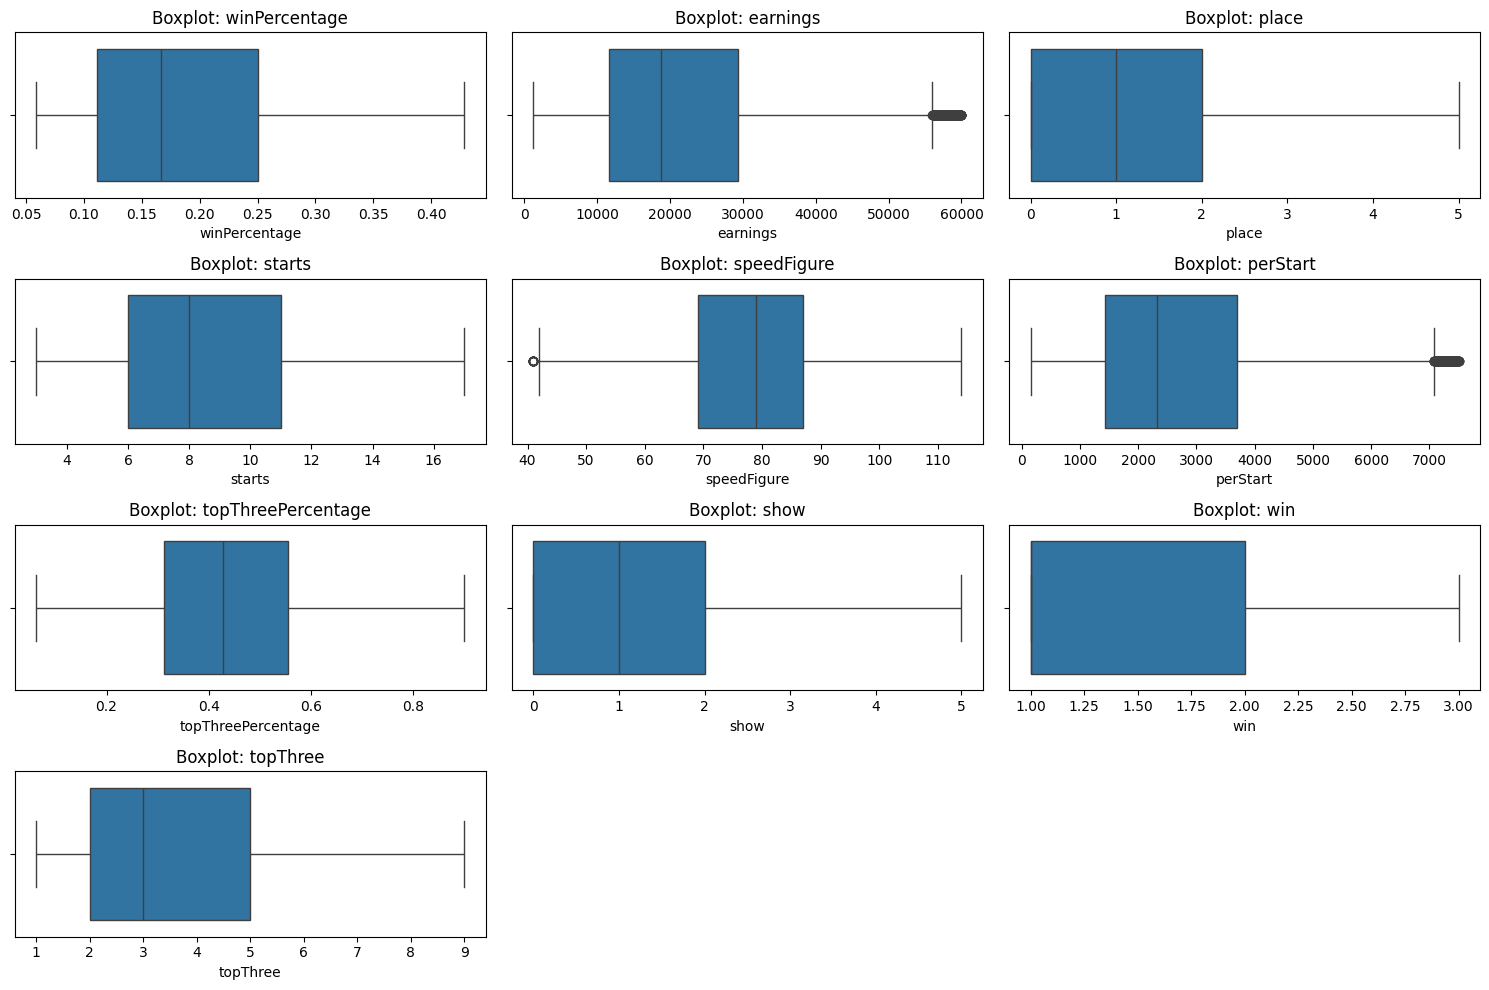

In [203]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(horsenum3, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=horsenum3[col])
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

In [204]:
horsesam2=horsenum3.sample(390,random_state=21)

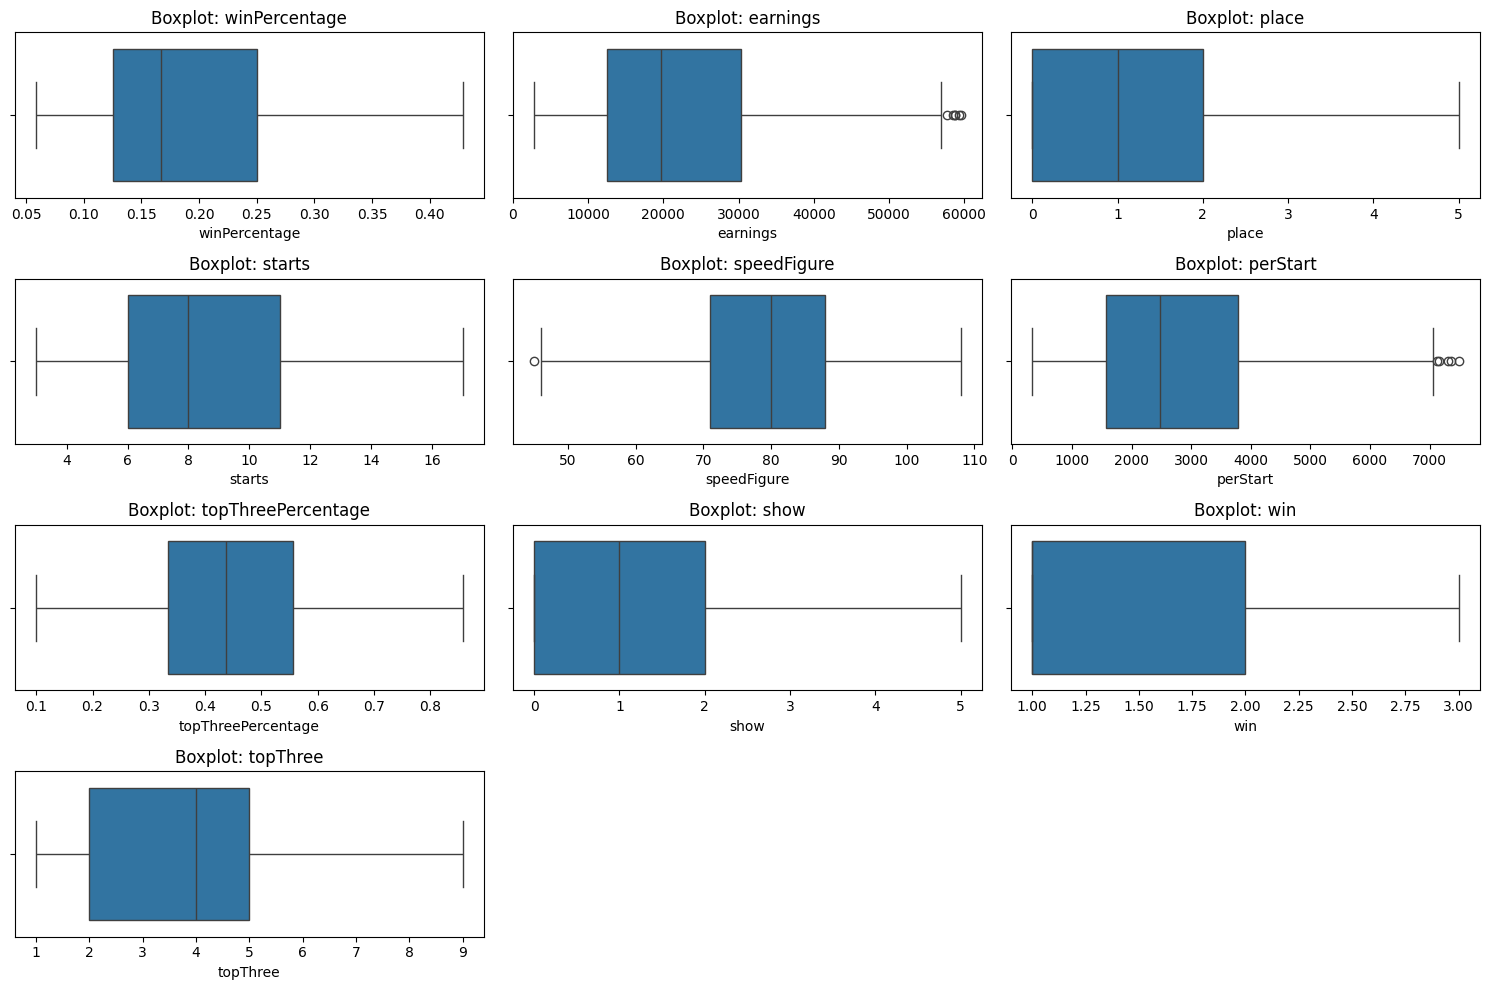

In [205]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(horsesam2, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=horsesam2[col])
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

In [206]:
horsensam4=horsesam2.drop(horsesam2[horsesam2.perStart>6500].index)
horsensam4=horsensam4.drop(horsensam4[horsensam4.earnings>52000].index)

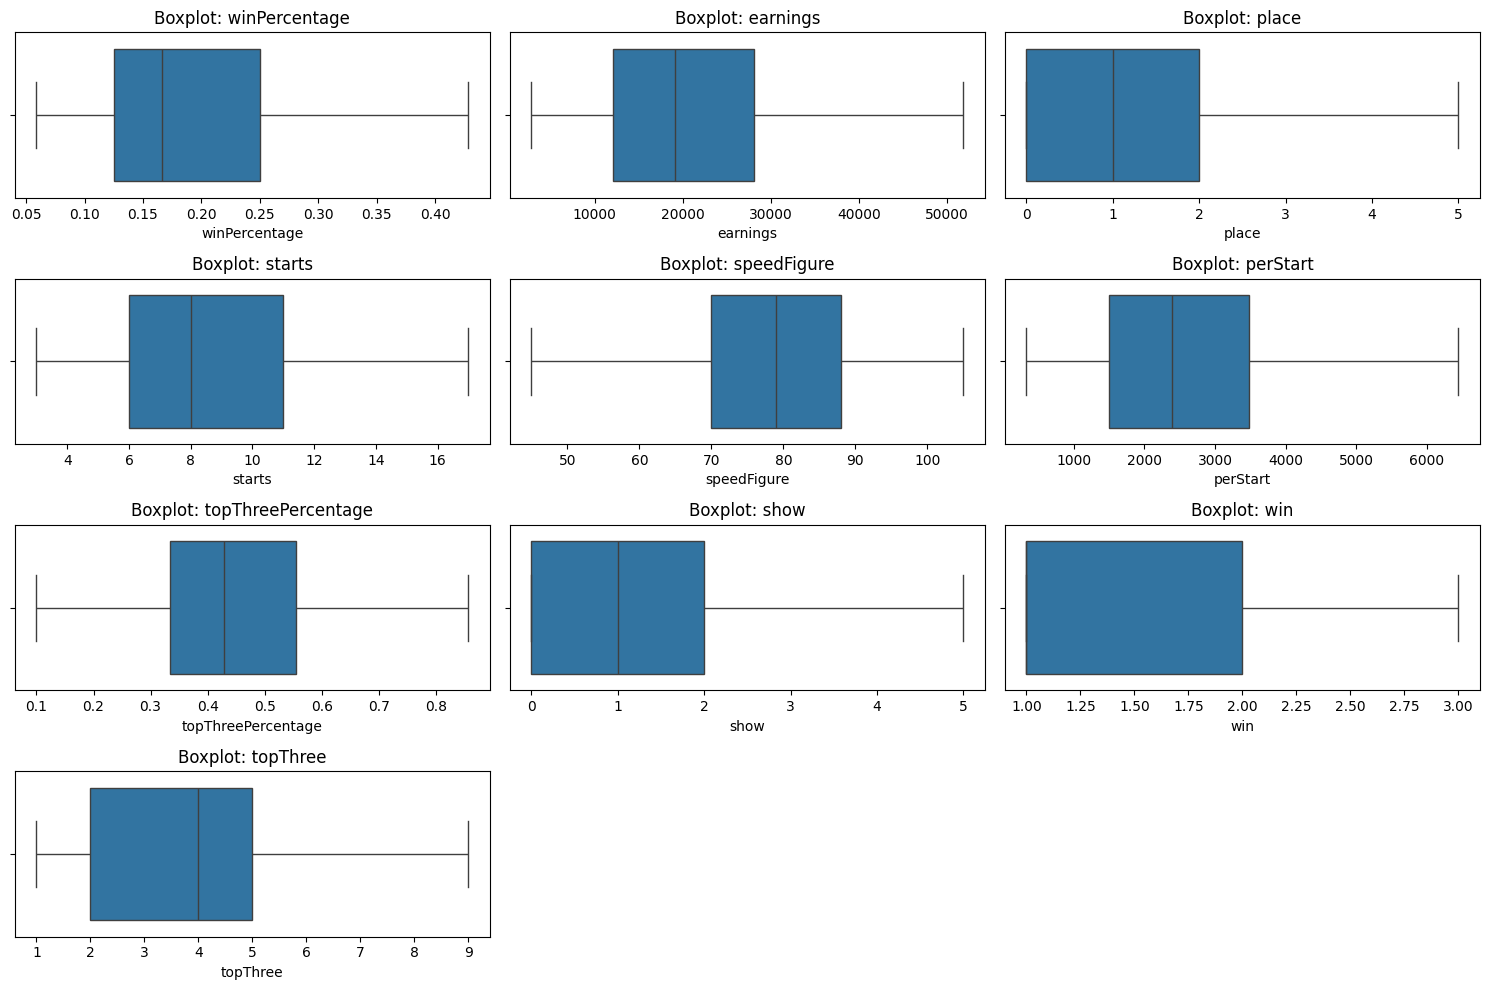

In [207]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(horsensam4, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=horsensam4[col])
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

In [301]:
horsensam4.shape

(367, 11)

In [302]:
horsensam4.describe()

,winPercentage,earnings,place,starts,speedFigure,perStart,topThreePercentage,show,win,topThree,cluster
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.184914,21229.784741,1.166213,8.768392,78.253406,2613.139994,0.441712,1.163488,1.482289,3.811989,0.544959
std,0.082793,11592.492457,1.119696,3.230369,12.543632,1420.199076,0.162070,1.109067,0.647895,1.836208,0.498654
min,0.058824,2834.000000,0.000000,3.000000,45.000000,331.727273,0.100000,0.000000,1.000000,1.000000,0.000000
25%,0.125000,12082.000000,0.000000,6.000000,70.000000,1503.134615,0.333333,0.000000,1.000000,2.000000,0.000000
50%,0.166667,19105.000000,1.000000,8.000000,79.000000,2386.000000,0.428571,1.000000,1.000000,4.000000,1.000000
75%,0.250000,28144.500000,2.000000,11.000000,88.000000,3485.115385,0.555556,2.000000,2.000000,5.000000,1.000000
max,0.428571,51867.000000,5.000000,17.000000,105.000000,6446.250000,0.857143,5.000000,3.000000,9.000000,1.000000


In [209]:
scaler = StandardScaler()
horsesca=scaler.fit_transform(horsensam4)
horsesca=pd.DataFrame(horsesca,index=horsensam4.index,columns=horsensam4.columns)

In [210]:
horsesca

,winPercentage,earnings,place,starts,speedFigure,perStart,topThreePercentage,show,win,topThree
horseName,,,,,,,,,,
14195,0.182461,0.183145,0.745672,-1.168144,0.857907,1.450267,0.977995,-1.050501,-0.745410,-0.442814
10457,-0.724647,0.857777,1.639991,-0.238190,-0.658874,0.903824,1.904783,0.755278,-0.745410,1.193219
16085,-0.220698,-0.070122,1.639991,1.001749,0.857907,-0.642786,1.389901,1.658168,0.800158,2.283907
23241,-1.136968,-0.792350,-1.042966,0.691764,-0.898366,-1.069653,-1.044087,0.755278,-0.745410,-0.442814
25651,-1.136968,-0.977636,-1.042966,0.691764,0.538584,-1.207145,-0.482398,1.658168,-0.745410,0.102531
...,...,...,...,...,...,...,...,...,...,...
24071,-0.508669,-0.859899,-1.042966,-0.548175,0.219262,-0.706798,-0.963846,-0.147611,-0.745410,-0.988158
9707,-0.623857,1.026219,-0.148647,1.931704,0.458754,-0.286129,-1.081533,-0.147611,0.800158,0.102531
24894,0.451234,-0.924253,-1.042966,0.071795,-0.100060,-1.017541,-1.356137,-1.050501,0.800158,-0.988158


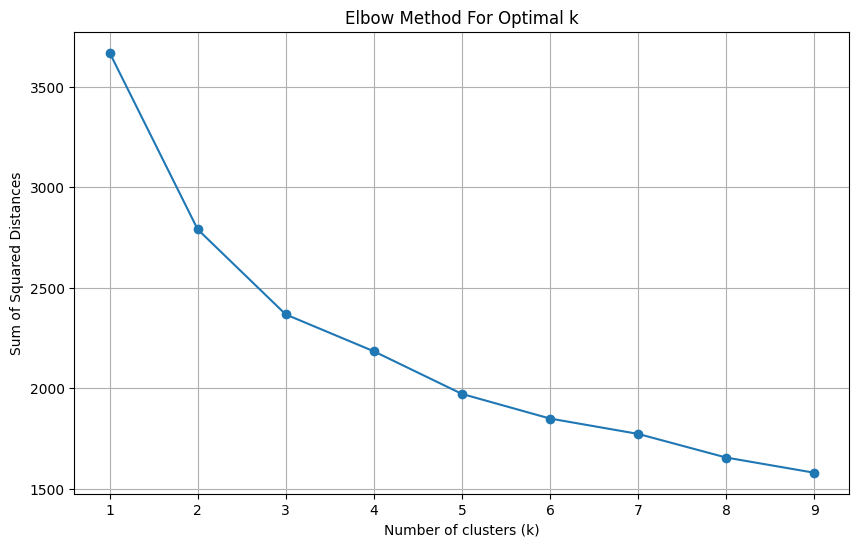

In [211]:
list_k = list(range(1, 10))

# Initialize an empty list to store the sum of squared distances for each model
sum_of_squared_distances = []

# Perform K-means clustering for each candidate value of k
for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(horsesca)
    # Append the sum of squared distances to the list
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(list_k, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

In [212]:
from sklearn.metrics import silhouette_score
distortions = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(horsesca)
    
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(horsesca ,kmeans.labels_))
for k, s in zip(K, silhouette_scores):
    print(f"K = {k}, Silhouette Score = {s:.3f}")

K = 2, Silhouette Score = 0.224
K = 3, Silhouette Score = 0.206
K = 4, Silhouette Score = 0.178
K = 5, Silhouette Score = 0.168
K = 6, Silhouette Score = 0.159
K = 7, Silhouette Score = 0.149
K = 8, Silhouette Score = 0.159
K = 9, Silhouette Score = 0.166
K = 10, Silhouette Score = 0.166


In [213]:
clusterer = KMeans(n_clusters=2,random_state=21).fit(horsesca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(horsesca)

In [214]:
horsensam4['cluster']=c_preds
horsensam4

,winPercentage,earnings,place,starts,speedFigure,perStart,topThreePercentage,show,win,topThree,cluster
horseName,,,,,,,,,,,
14195,0.200000,23350,2,5,89,4670.000000,0.600000,0,1,3,1
10457,0.125000,31160,3,8,70,3895.000000,0.750000,2,1,6,0
16085,0.166667,20418,3,12,89,1701.500000,0.666667,3,2,8,0
23241,0.090909,12057,0,11,67,1096.090909,0.272727,2,1,3,1
25651,0.090909,9912,0,11,85,901.090909,0.363636,3,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
24071,0.142857,11275,0,7,81,1610.714286,0.285714,1,1,2,1
9707,0.133333,33110,1,15,84,2207.333333,0.266667,1,2,4,0
24894,0.222222,10530,0,9,77,1170.000000,0.222222,0,2,2,1


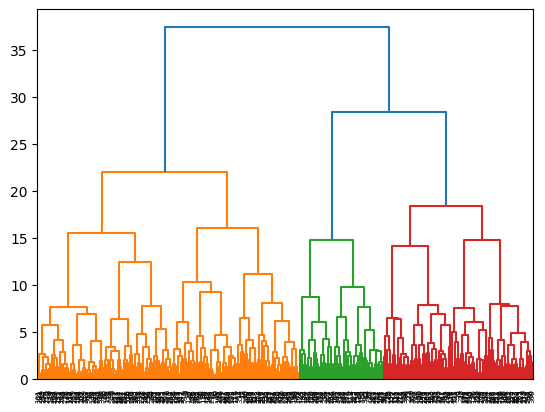

In [286]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



linkage_data = linkage(horsesca, method='ward')
dendrogram(linkage_data)

plt.show()

In [287]:
linkage_data.shape

(366, 4)

In [283]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hierarchical_cluster.fit_predict(horsesca)

In [285]:
horsesca

,winPercentage,earnings,place,starts,speedFigure,perStart,topThreePercentage,show,win,topThree
horseName,,,,,,,,,,
14195,0.182461,0.183145,0.745672,-1.168144,0.857907,1.450267,0.977995,-1.050501,-0.745410,-0.442814
10457,-0.724647,0.857777,1.639991,-0.238190,-0.658874,0.903824,1.904783,0.755278,-0.745410,1.193219
16085,-0.220698,-0.070122,1.639991,1.001749,0.857907,-0.642786,1.389901,1.658168,0.800158,2.283907
23241,-1.136968,-0.792350,-1.042966,0.691764,-0.898366,-1.069653,-1.044087,0.755278,-0.745410,-0.442814
25651,-1.136968,-0.977636,-1.042966,0.691764,0.538584,-1.207145,-0.482398,1.658168,-0.745410,0.102531
...,...,...,...,...,...,...,...,...,...,...
24071,-0.508669,-0.859899,-1.042966,-0.548175,0.219262,-0.706798,-0.963846,-0.147611,-0.745410,-0.988158
9707,-0.623857,1.026219,-0.148647,1.931704,0.458754,-0.286129,-1.081533,-0.147611,0.800158,0.102531
24894,0.451234,-0.924253,-1.042966,0.071795,-0.100060,-1.017541,-1.356137,-1.050501,0.800158,-0.988158


In [238]:
hon=pd.merge(horsensam4,horsen,left_index=True, right_index=True)

In [304]:
horsensam4.groupby('cluster').mean()

,winPercentage,earnings,place,starts,speedFigure,perStart,topThreePercentage,show,win,topThree
cluster,,,,,,,,,,
0,0.187259,28899.047904,1.760479,10.538922,83.706587,2983.828200,0.527269,1.754491,1.844311,5.359281
1,0.182956,14825.950000,0.670000,7.290000,73.700000,2303.615343,0.370272,0.670000,1.180000,2.520000


In [305]:
horsensam4['label']=labels

In [307]:
horsensam4.groupby('label').mean()

,winPercentage,earnings,place,starts,speedFigure,perStart,topThreePercentage,show,win,topThree,cluster
label,,,,,,,,,,,
0,0.193165,16582.597938,0.644330,7.175258,75.948454,2553.568861,0.377317,0.618557,1.247423,2.510309,0.881443
1,0.123330,22956.072072,2.036036,11.234234,76.954955,2104.910477,0.495769,2.045045,1.360360,5.441441,0.261261
2,0.269352,32680.370968,1.241935,9.338710,87.790323,3709.434773,0.546427,1.290323,2.435484,4.967742,0.000000


In [265]:
random_horse = horsensam4.sample(1, random_state=85)
random_index = random_horse.index[0]
horse_cluster = horsensam4.loc[random_index, 'cluster']
random_index
hon.loc[random_index,['horseName']]

horseName    No More Fast Women
Name: 15064, dtype: object

In [248]:
cluster_members = horsesca[horsensam4['cluster'] == horse_cluster].index

In [249]:
cluster_members = cluster_members[cluster_members != random_index ]

In [251]:
distances = {}
for uma in cluster_members:
    dist = np.linalg.norm(horsesca.loc[random_index ] - horsesca.loc[uma])
    distances[uma] = dist

In [255]:
sorted(distances,  key=distances.get)

[13352,
 16742,
 19417,
 19000,
 16750,
 18573,
 17748,
 12250,
 20928,
 17700,
 18921,
 16843,
 18389,
 20201,
 19687,
 8576,
 11398,
 23126,
 22366,
 20045,
 21481,
 15114,
 11223,
 19835,
 28393,
 22008,
 21206,
 17849,
 19909,
 19434,
 22875,
 20636,
 17861,
 13092,
 20297,
 10132,
 12016,
 20757,
 25585,
 14287,
 25314,
 7202,
 25673,
 24172,
 30801,
 24071,
 28850,
 16880,
 27693,
 21818,
 13227,
 27933,
 27199,
 19428,
 14874,
 18846,
 29116,
 28406,
 7990,
 32281,
 11890,
 22213,
 17133,
 29244,
 24573,
 17219,
 30825,
 27138,
 29890,
 28224,
 27001,
 10544,
 19042,
 29969,
 10134,
 19131,
 16057,
 16839,
 18492,
 5795,
 28798,
 14996,
 16256,
 23255,
 12175,
 24944,
 16507,
 15011,
 24894,
 27687,
 16960,
 20345,
 13107,
 28026,
 24543,
 21577,
 19984,
 17329,
 24538,
 17634,
 11999,
 14979,
 21061,
 19347,
 25913,
 26065,
 14195,
 25228,
 31180,
 17028,
 25963,
 31951,
 12568,
 28996,
 22121,
 21189,
 28651,
 19958,
 33150,
 10656,
 21483,
 20646,
 34872,
 12898,
 16247,
 218

In [294]:

recommendations = sorted(distances, key=distances.get)[:2]
for uma in recommendations:
    print(f" {hon.loc[uma,['horseName']]},  Distance: {distances[uma]:.4f}")

 horseName    Big Money Max
Name: 13352, dtype: object,  Distance: 0.5094
 horseName    Infantry
Name: 16742, dtype: object,  Distance: 0.6823


In [263]:
hon.loc[13352,['horseName']]

horseName    Big Money Max
Name: 13352, dtype: object

In [290]:
silhouette_score(horsesca,c_preds)

0.22362390584628283

In [289]:
silhouette_score(horsesca,labels)

0.17271258028087563

In [277]:
horsesca

,winPercentage,earnings,place,starts,speedFigure,perStart,topThreePercentage,show,win,topThree
horseName,,,,,,,,,,
14195,0.182461,0.183145,0.745672,-1.168144,0.857907,1.450267,0.977995,-1.050501,-0.745410,-0.442814
10457,-0.724647,0.857777,1.639991,-0.238190,-0.658874,0.903824,1.904783,0.755278,-0.745410,1.193219
16085,-0.220698,-0.070122,1.639991,1.001749,0.857907,-0.642786,1.389901,1.658168,0.800158,2.283907
23241,-1.136968,-0.792350,-1.042966,0.691764,-0.898366,-1.069653,-1.044087,0.755278,-0.745410,-0.442814
25651,-1.136968,-0.977636,-1.042966,0.691764,0.538584,-1.207145,-0.482398,1.658168,-0.745410,0.102531
...,...,...,...,...,...,...,...,...,...,...
24071,-0.508669,-0.859899,-1.042966,-0.548175,0.219262,-0.706798,-0.963846,-0.147611,-0.745410,-0.988158
9707,-0.623857,1.026219,-0.148647,1.931704,0.458754,-0.286129,-1.081533,-0.147611,0.800158,0.102531
24894,0.451234,-0.924253,-1.042966,0.071795,-0.100060,-1.017541,-1.356137,-1.050501,0.800158,-0.988158


In [279]:
labels.shape

(367,)

In [281]:
linkage_data.shape

(366, 4)

In [292]:
from sklearn.metrics import normalized_mutual_info_score

nmi=normalized_mutual_info_score(c_preds,labels)
nmi

0.38259390311034697

In [297]:
def purity(y_clust,y_class):
    size_clust = np.max(y_clust)+1
    len_clust = len(y_clust)
    clusters_labels = [None] * size_clust
    for i in range(len_clust):
        index = y_clust[i]
        if clusters_labels[index] is None:
            clusters_labels[index] = y_class[i]
        else:
            clusters_labels[index] = np.hstack((clusters_labels[index], y_class[i]))
    purity = 0
    for c in clusters_labels:
        y = np.bincount(c) #I find occurrences of the present elements
        maximum = np.max(y) #I take the item more frequently
        purity += maximum

    purity = purity/len_clust

    return purity

In [298]:
purity(labels,c_preds)

0.8583106267029973